In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, LabelEncoder,StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

In [2]:
df=pd.read_csv('/kaggle/input/titanic-dataset/Titanic-Dataset.csv')

In [3]:
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

- There is alot of null values within the table so we will remove the cabin column and we will remove the null rows of age because age is an essential factor and remove the null values of embarked 

In [6]:
df.drop(['Cabin'], axis=1,inplace=True)

- Dropped Cabin Column because too many null values

In [7]:
df.dropna(inplace=True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 712 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  712 non-null    int64  
 1   Survived     712 non-null    int64  
 2   Pclass       712 non-null    int64  
 3   Name         712 non-null    object 
 4   Sex          712 non-null    object 
 5   Age          712 non-null    float64
 6   SibSp        712 non-null    int64  
 7   Parch        712 non-null    int64  
 8   Ticket       712 non-null    object 
 9   Fare         712 non-null    float64
 10  Embarked     712 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 66.8+ KB


- Now there is no null values

In [9]:
df.duplicated().sum()

0

- There is no Duplicates Values

# UniVariate Analysis

### Survived Column

In [10]:
survived_counts = df['Survived'].value_counts()
survived_counts

Survived
0    424
1    288
Name: count, dtype: int64

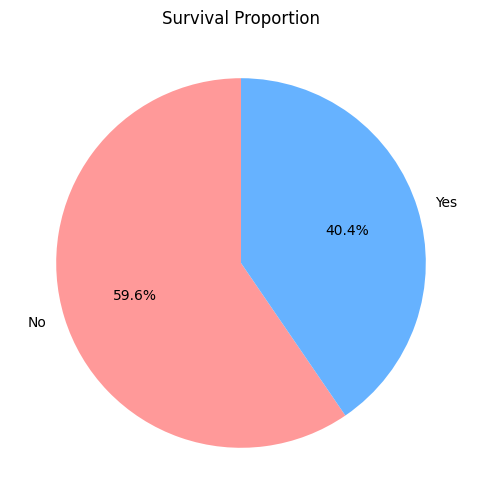

In [11]:
plt.figure(figsize=(8, 6))
plt.pie(survived_counts, labels=['No', 'Yes'], autopct='%1.1f%%', colors=['#FF9999', '#66B2FF'], startangle=90)
plt.title('Survival Proportion')
plt.show()

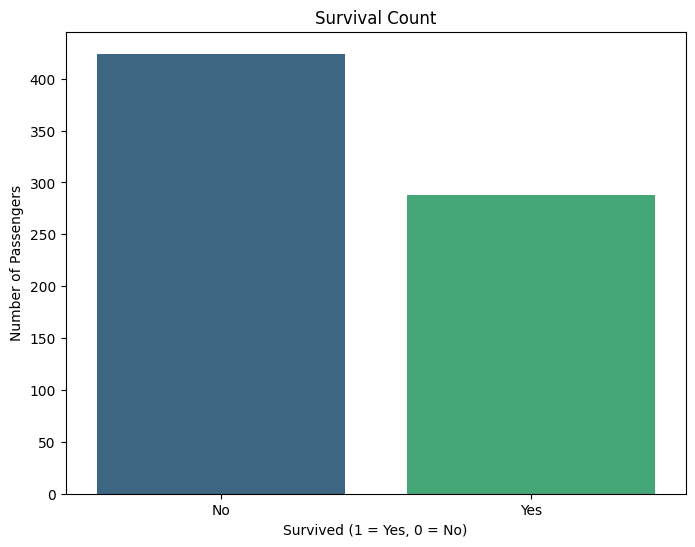

In [12]:

plt.figure(figsize=(8, 6))
sns.barplot(x=survived_counts.index, y=survived_counts.values, palette='viridis')
plt.title('Survival Count')
plt.xlabel('Survived (1 = Yes, 0 = No)')
plt.ylabel('Number of Passengers')
plt.xticks([0, 1], ['No', 'Yes'])
plt.show()

- More People Died than Survived

### Pclass Column

In [13]:
df['Pclass'].value_counts()

Pclass
3    355
1    184
2    173
Name: count, dtype: int64

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


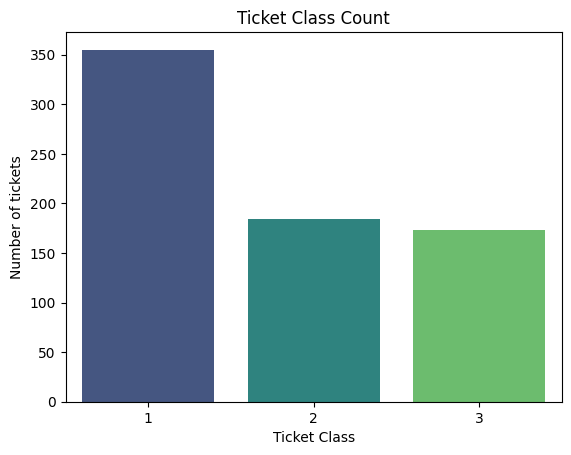

In [14]:
sns.barplot(x=[1,2,3],y=df['Pclass'].value_counts(),palette='viridis')
plt.title("Ticket Class Count")
plt.ylabel('Number of tickets')
plt.xlabel('Ticket Class')
plt.show()

- Most of the tickets were first Class and second and third class people were nearly the same count

### Sex Column

In [15]:
df.Sex.value_counts()

Sex
male      453
female    259
Name: count, dtype: int64

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


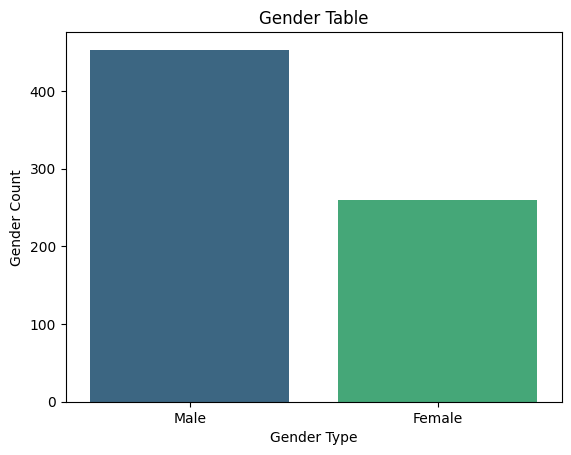

In [16]:
sns.barplot(x=['Male','Female'],y=df.Sex.value_counts(),palette='viridis')
plt.title("Gender Table")
plt.xlabel('Gender Type')
plt.ylabel('Gender Count')
plt.show()


- More Male than Female where on the ship

### Age Column

In [17]:
df.Age.describe()

count    712.000000
mean      29.642093
std       14.492933
min        0.420000
25%       20.000000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


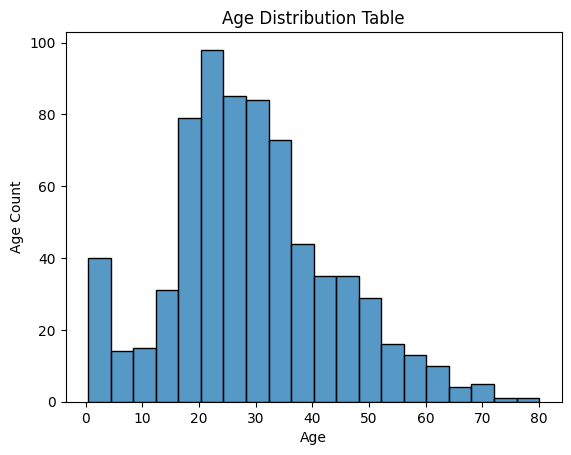

In [18]:
sns.histplot(x=df['Age'],bins=20)
plt.title("Age Distribution Table")
plt.xlabel("Age")
plt.ylabel('Age Count')
plt.show()

- Most ages were from 20 to 30 years but there was a lot of babies too 

### SibSp column

In [19]:
df.SibSp.value_counts()

SibSp
0    469
1    183
2     25
4     18
3     12
5      5
Name: count, dtype: int64

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


<Axes: ylabel='count'>

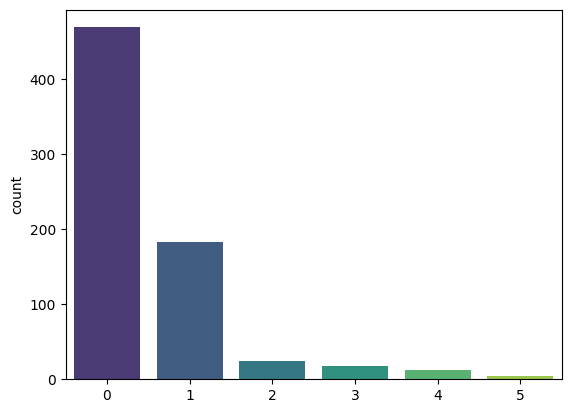

In [20]:
sns.barplot(x=['0','1','2','3','4','5'],y=df.SibSp.value_counts(),palette='viridis')

- Most people were alone/ had no siblings on the Ship

### Parch Column

In [21]:
df.Parch.value_counts()

Parch
0    519
1    110
2     68
5      5
3      5
4      4
6      1
Name: count, dtype: int64

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


<Axes: ylabel='count'>

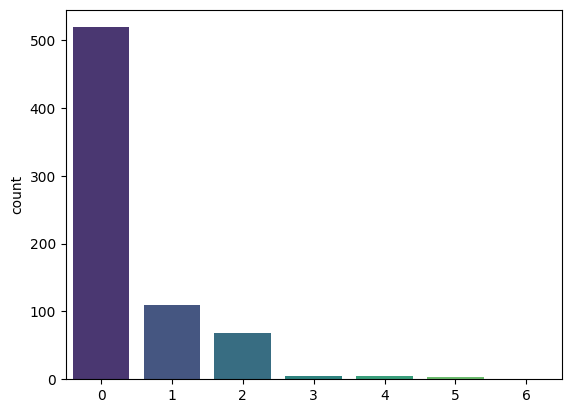

In [22]:
sns.barplot(x=['0','1','2','3','4','5','6'],y=df.Parch.value_counts(),palette='viridis')

- Most People had no Parents/ Children on the ship

### Fare Column


In [23]:
df.Fare.describe()

count    712.000000
mean      34.567251
std       52.938648
min        0.000000
25%        8.050000
50%       15.645850
75%       33.000000
max      512.329200
Name: Fare, dtype: float64

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0, 0.5, 'Fair Price')

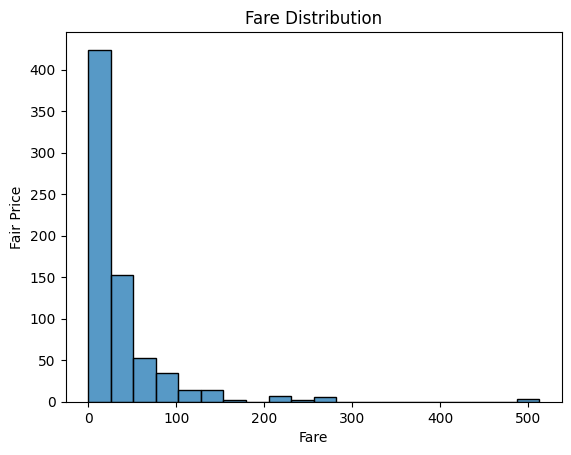

In [24]:
sns.histplot(df['Fare'], bins=20)
plt.title("Fare Distribution")
plt.xlabel("Fare")
plt.ylabel("Fair Price")

- The most fare from 0 to 100 but there is alot of outliers so we must detect the outliers

#### Detecting Outliers

In [25]:
Q1= df['Fare'].quantile(0.25)
Q3=df['Fare'].quantile(0.75)

IQR=Q3-Q1

upper=Q3 + 1.5*IQR
Lower=Q1 - 1.5*IQR

print(upper)
print(Lower)

70.425
-29.374999999999996


- There is alot of upper outliers and we are going to point them out 

In [26]:
df[df["Fare"]>70]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0000,S
34,35,0,1,"Meyer, Mr. Edgar Joseph",male,28.0,1,0,PC 17604,82.1708,C
52,53,1,1,"Harper, Mrs. Henry Sleeper (Myna Haxtun)",female,49.0,1,0,PC 17572,76.7292,C
62,63,0,1,"Harris, Mr. Henry Birkhardt",male,45.0,1,0,36973,83.4750,S
...,...,...,...,...,...,...,...,...,...,...,...
802,803,1,1,"Carter, Master. William Thornton II",male,11.0,1,2,113760,120.0000,S
820,821,1,1,"Hays, Mrs. Charles Melville (Clara Jennings Gr...",female,52.0,1,1,12749,93.5000,S
835,836,1,1,"Compton, Miss. Sara Rebecca",female,39.0,1,1,PC 17756,83.1583,C
856,857,1,1,"Wick, Mrs. George Dennick (Mary Hitchcock)",female,45.0,1,1,36928,164.8667,S


- There are 95 People that paid higher than average amount of Fare which can be understood because people who paid alot more than average may be because they reserved later and so on

### Embarked Column

In [27]:
Embarked_counts=df['Embarked'].value_counts()
Embarked_counts

Embarked
S    554
C    130
Q     28
Name: count, dtype: int64

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


<Axes: ylabel='count'>

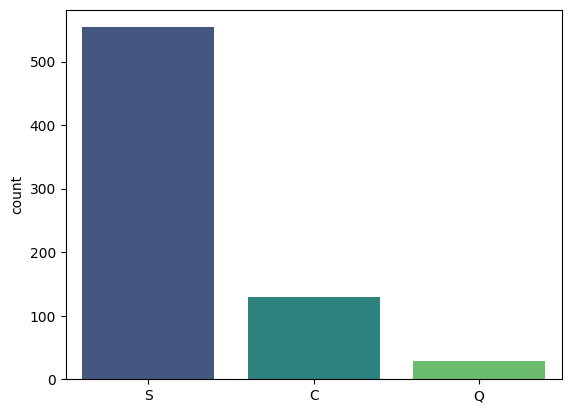

In [28]:
sns.barplot(x=['S','C','Q'],y=Embarked_counts,palette='viridis')

# Multi Variate Analysis

In [29]:
df.groupby(['Sex'])['Survived'].value_counts()

Sex     Survived
female  1           195
        0            64
male    0           360
        1            93
Name: count, dtype: int64

- Alot more Males Died than Females because at this instances males priotize women to survive than men
- More Men Died than Survived
- More Female Survived than Died

In [30]:
df.groupby(['Pclass'])['Survived'].value_counts()

Pclass  Survived
1       1           120
        0            64
2       0            90
        1            83
3       0           270
        1            85
Name: count, dtype: int64

- Most People Died from Class 3 because this was the closest to the ocean 
- People from Class 1 where the most ones survived as they were the highest from the ocean and they were priotized to get on boats 
- People from Class 2 where almost 50/50 to survive

In [31]:
df.groupby(['Pclass','Sex'])['Survived'].value_counts()

Pclass  Sex     Survived
1       female  1            80
                0             3
        male    0            61
                1            40
2       female  1            68
                0             6
        male    0            84
                1            15
3       female  0            55
                1            47
        male    0           215
                1            38
Name: count, dtype: int64

- Least men died where from Class 1 and only 3 women died from class 1 
- Most men and women died where from Class 3
- The only Class that more Females Died than Survived where in Class 1
- The least percantage of men that died where on Class 1


- This Concludes that Class 1 was the most priotized and safest place on the Ship

In [32]:
bins = [0, 18, 35, 50, 65, float('inf')]
labels = ['0-18', '19-35', '36-50', '51-65', '66+']
df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)


In [33]:
df[df['Survived']==0].groupby(['AgeGroup'])['Survived'].value_counts()

/tmp/ipykernel_36/2852615816.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df[df['Survived']==0].groupby(['AgeGroup'])['Survived'].value_counts()


AgeGroup  Survived
0-18      0            52
19-35     0           231
36-50     0            94
51-65     0            37
66+       0            10
Name: count, dtype: int64

- Most people died were from ages 19-35 after it people from ages 36-50

In [34]:
df.groupby(['AgeGroup','Sex'])['Survived'].value_counts()


/tmp/ipykernel_36/2519111940.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(['AgeGroup','Sex'])['Survived'].value_counts()


AgeGroup  Sex     Survived
0-18      female  1            38
                  0            17
          male    0            35
                  1            23
19-35     female  1            94
                  0            31
          male    0           200
                  1            41
36-50     female  1            44
                  0            14
          male    0            80
                  1            22
51-65     female  1            19
                  0             2
          male    0            35
                  1             6
66+       female  0             0
                  1             0
          male    0            10
                  1             1
Name: count, dtype: int64

In [35]:
df.groupby(['SibSp'])['Survived'].value_counts()

SibSp  Survived
0      0           296
       1           173
1      1            97
       0            86
2      0            14
       1            11
3      0             8
       1             4
4      0            15
       1             3
5      0             5
Name: count, dtype: int64

In [36]:
df.groupby(['Parch'])['Survived'].value_counts()

Parch  Survived
0      0           335
       1           184
1      1            61
       0            49
2      1            39
       0            29
3      1             3
       0             2
4      0             4
5      0             4
       1             1
6      0             1
Name: count, dtype: int64

# Machine Learning

### Logistic Regression

#### Preproccessing

In [37]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 712 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  712 non-null    int64   
 1   Survived     712 non-null    int64   
 2   Pclass       712 non-null    int64   
 3   Name         712 non-null    object  
 4   Sex          712 non-null    object  
 5   Age          712 non-null    float64 
 6   SibSp        712 non-null    int64   
 7   Parch        712 non-null    int64   
 8   Ticket       712 non-null    object  
 9   Fare         712 non-null    float64 
 10  Embarked     712 non-null    object  
 11  AgeGroup     712 non-null    category
dtypes: category(1), float64(2), int64(5), object(4)
memory usage: 67.7+ KB


In [38]:
df.corr(numeric_only=True)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,0.029526,-0.035609,0.033681,-0.082704,-0.011672,0.009655
Survived,0.029526,1.000000,-0.356462,-0.082446,-0.015523,0.095265,0.266100
Pclass,-0.035609,-0.356462,1.000000,-0.365902,0.065187,0.023666,-0.552893
Age,0.033681,-0.082446,-0.365902,1.000000,-0.307351,-0.187896,0.093143
SibSp,-0.082704,-0.015523,0.065187,-0.307351,1.000000,0.383338,0.139860
Parch,-0.011672,0.095265,0.023666,-0.187896,0.383338,1.000000,0.206624
Fare,0.009655,0.266100,-0.552893,0.093143,0.139860,0.206624,1.000000


In [39]:
df.drop(['PassengerId','Ticket','Name','AgeGroup'],axis=1,inplace=True)

In [40]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [41]:
encoder= LabelEncoder()
df['Sex']=encoder.fit_transform(df['Sex'])
df['Embarked']=encoder.fit_transform(df['Embarked'])
df['Survived']=encoder.fit_transform(df['Survived'])


In [42]:
X=df.drop(columns=["Survived"])
y=df.Survived


In [43]:
X

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,22.0,1,0,7.2500,2
1,1,0,38.0,1,0,71.2833,0
2,3,0,26.0,0,0,7.9250,2
3,1,0,35.0,1,0,53.1000,2
4,3,1,35.0,0,0,8.0500,2
...,...,...,...,...,...,...,...
885,3,0,39.0,0,5,29.1250,1
886,2,1,27.0,0,0,13.0000,2
887,1,0,19.0,0,0,30.0000,2
889,1,1,26.0,0,0,30.0000,0


In [44]:
y

0      0
1      1
2      1
3      1
4      0
      ..
885    0
886    0
887    1
889    1
890    0
Name: Survived, Length: 712, dtype: int64

In [45]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,shuffle=True,random_state=7)

In [46]:
model=LogisticRegression(max_iter=12000)
model.fit(X_train,y_train)

LogisticRegression(max_iter=12000)

In [47]:
y_pred=model.predict(X_test)

In [48]:
model.score(X_train,y_train)*100

81.01933216168717

In [49]:
model.score(X_test,y_test)*100

79.72027972027972

In [50]:
rate=accuracy_score(y_test,y_pred)*100
print(f'{int(rate)}%')

79%


In [51]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.80      0.90      0.84        88
           1       0.80      0.64      0.71        55

    accuracy                           0.80       143
   macro avg       0.80      0.77      0.78       143
weighted avg       0.80      0.80      0.79       143



In [52]:
print(confusion_matrix(y_test,y_pred))

[[79  9]
 [20 35]]


### SVC

In [53]:
modelsv=SVC()
modelsv.fit(X_train,y_train)

SVC()

In [54]:
y_pred=modelsv.predict(X_test)

In [55]:
modelsv.score(X_train,y_train)*100

66.95957820738137

In [56]:
modelsv.score(X_test,y_test)*100

69.93006993006993

In [57]:
rate=accuracy_score(y_test,y_pred)*100
print(f'{int(rate)}%')

69%


## KNN Classifier

In [58]:
ModelK=KNeighborsClassifier(n_neighbors=12)
ModelK.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=12)

In [59]:
y_pred=ModelK.predict(X_test)

In [60]:
ModelK.score(X_train,y_train)*100

73.63796133567662

In [61]:
ModelK.score(X_test,y_test)*100

71.32867132867133

In [62]:
rate=accuracy_score(y_test,y_pred)*100
print(f'{int(rate)}%')

71%


In [63]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.74      0.82      0.78        88
           1       0.65      0.55      0.59        55

    accuracy                           0.71       143
   macro avg       0.70      0.68      0.69       143
weighted avg       0.71      0.71      0.71       143



In [64]:
print(confusion_matrix(y_test,y_pred))

[[72 16]
 [25 30]]


## Decision Tree Classifier 

In [65]:
classifier=DecisionTreeClassifier()
classifier.fit(X_train,y_train)

DecisionTreeClassifier()

In [66]:
y_pred=classifier.predict(X_test)

In [67]:
print(classifier.score(X_train,y_train)*100)

98.76977152899823


In [68]:
print(classifier.score(X_test,y_test)*100)

69.93006993006993


In [69]:
print(accuracy_score(y_test,y_pred)*100)

69.93006993006993
